M8O-402Б-21 Кириченко Александра

Загрузить данные о больных, с наличием рака `load_breast_cancer()`. 
Разбить данные в соотношении 7/3, random_state=12.

* Рассмотреть методы из лекции о линейных моделях. Оценить разброс характеристики качества для каждого из методов с параметрами по умолчанию, проведя кросс-валидацию по 5ти блокам на тренировочный выборке.
* Выбрать один из методов для дальнейшей работы, демонстрирующий лучшее качество
* Подключить недостающие пакеты, выполнить при необходимости дополнительные преобразования
* Для выбранного метода подобрать лучшие значения гиперпараметров
* Оценить качество настроенного классификатора на тестовой выбоке

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

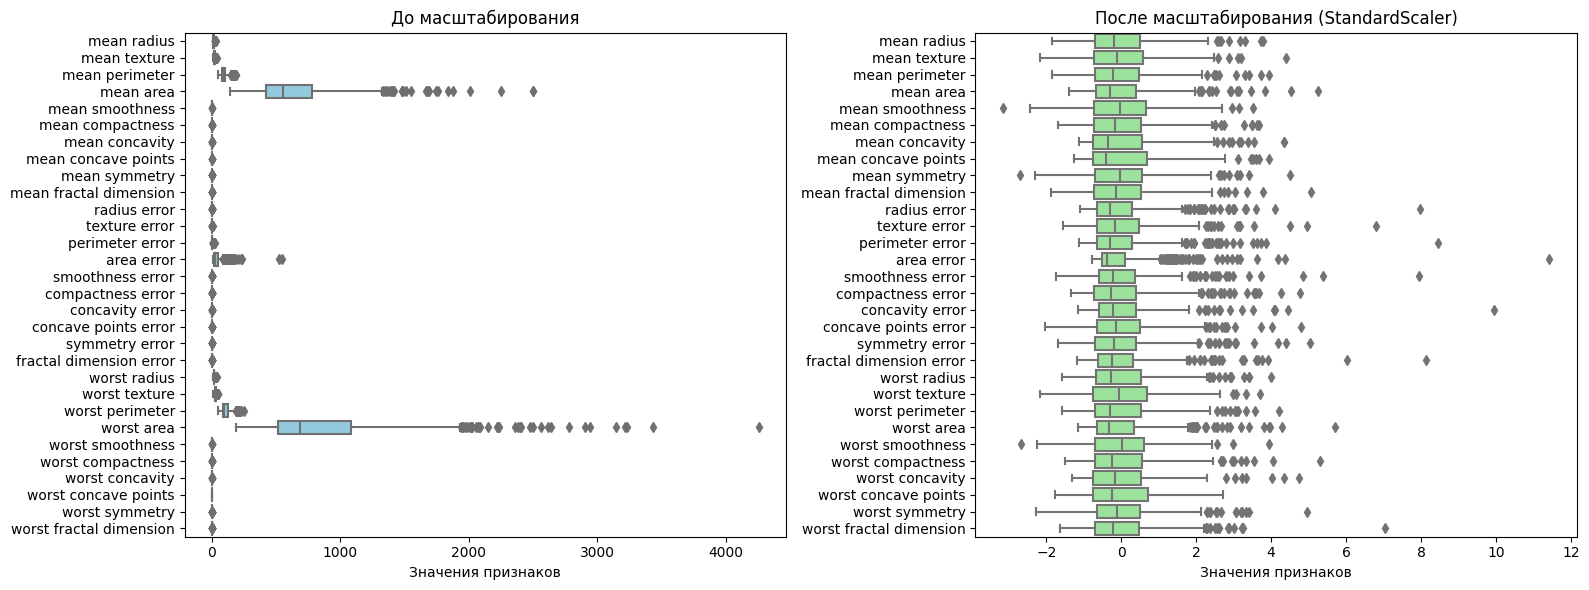

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
df_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = scaler.transform(X_test)

# Построение графиков до и после масштабирования
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, orient='h', ax=axes[0], color='skyblue')
axes[0].set_title("До масштабирования")
axes[0].set_xlabel("Значения признаков")

sns.boxplot(data=df_scaled, orient='h', ax=axes[1], color='lightgreen')
axes[1].set_title("После масштабирования (StandardScaler)")
axes[1].set_xlabel("Значения признаков")

plt.tight_layout()
plt.show()

In [3]:
models = {
    "Perceptron": Perceptron(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(max_iter=10000),
}

# Кросс-валидация и вывод результатов
best_model_name = None
best_score = 0
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    mean_score = scores.mean()
    std_score = scores.std()
    print(f"{name}: mean={mean_score:.4f}, std={std_score:.4f}")
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name
print(f"\nВыбрана модель: {best_model_name}")

Perceptron: mean=0.9699, std=0.0231
Logistic Regression: mean=0.9799, std=0.0101
Linear SVM: mean=0.9749, std=0.0113

Выбрана модель: Logistic Regression


In [4]:
# Настройка гиперпараметров
model = LogisticRegression(max_iter=1000)
param_grid = {'C': np.logspace(-4, 4, 10)}
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

print(f"\nЛучшие параметры: {grid_search.best_params_}")

# Оценка на тестовой выборке
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
print(f"Точность на тестовой выборке: {test_acc:.4f}")



Лучшие параметры: {'C': 21.54434690031882}
Точность на тестовой выборке: 0.9708
